In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt
import seaborn as sns

/Users/kazuki.funahashi/miniconda3/envs/bitools_py3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../data_input/metabolome_zscrore.tsv", sep="\t", index_col=0)
gp = pd.read_excel('../config/compound_group.xlsx', index_col=0, engine='openpyxl')

In [3]:
gp = gp.T

In [4]:
gp.loc[:, "color"] = 0

In [5]:
gp.loc[gp[gp["group"] == "SCFA"].index, "color"] = "#A8503D"
gp.loc[gp[gp["group"] == "BA"].index, "color"] = "#0C5445"
gp.loc[gp[gp["group"] == "Aminoacids"].index, "color"] = "#132FBA"
gp.loc[gp[gp["group"] == "Sugar"].index, "color"] = "#fea5c6"
gp.loc[gp[gp["group"] == "Other"].index, "color"] = "#F7EAC3"

In [6]:
plt.rcParams["font.family"] = "Arial"

In [7]:
gp

,group,color
Formic acid,SCFA,#A8503D
Acetic acid,SCFA,#A8503D
Propionic acid,SCFA,#A8503D
Isobutyric acid,SCFA,#A8503D
Butyric acid,SCFA,#A8503D
Isovaleric acid,SCFA,#A8503D
Valeric acid,SCFA,#A8503D
DCA,BA,#0C5445
HDCA,BA,#0C5445
beta-MCA,BA,#0C5445


In [8]:
df_row_color = pd.Series(gp.loc[:, "color"])
df_row_color.index = df.columns

In [9]:
df_col_color = pd.Series(
    [
        "#479b3f", 
        "#479b3f", 
        "#479b3f", 
        "#479b3f", 
        "#4472c4",
        "#4472c4",
        "#4472c4",
        "#4472c4",
        "#db6a51",
        "#db6a51",
        "#db6a51",
        "#db6a51",
    ]
)
df_col_color.index = df.index

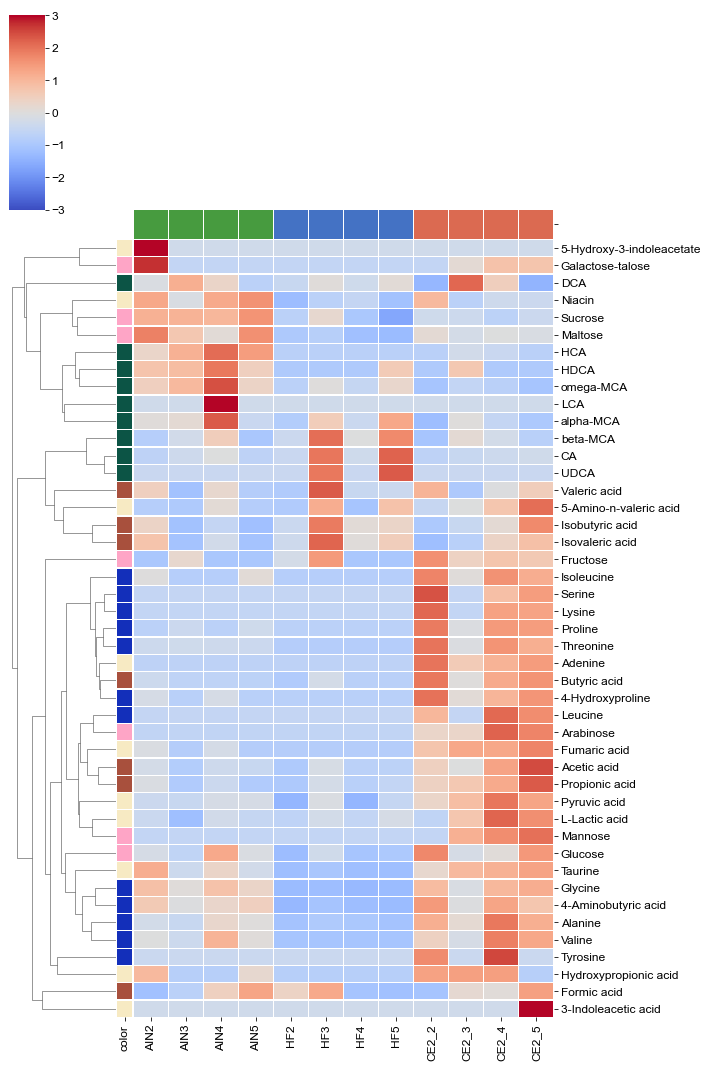

In [10]:
plt.rcParams.update({
    'font.size': 12,  # ベースのフォントサイズ
    'axes.titlesize': 16,  # タイトルのフォントサイズ
    'axes.labelsize': 14,  # 軸ラベルのフォントサイズ
    'xtick.labelsize': 12,  # x軸の目盛りラベルのフォントサイズ
    'ytick.labelsize': 12,  # y軸の目盛りラベルのフォントサイズ
    'legend.fontsize': 12,  # 凡例のフォントサイズ
    'figure.titlesize': 18  # 図全体のタイトルのフォントサイズ
})

# クラスター図を作成
clustermap = sns.clustermap(
    df.T.dropna(),
    cmap="coolwarm",
    vmin=-3,
    vmax=3,
    linewidths=.2,
    col_cluster=False,
    row_colors=df_row_color,
    col_colors=df_col_color,
    figsize=(10, 15)
)


In [11]:
# sfig = clustermap.get_figure()
clustermap.savefig("clustermap.jpeg", orientation="landscape", dpi=2000, bbox_inches='tight')